<div class="alert alert-block alert-info">
<b>

# Python for Data Science Bootcamp
## Lecture 21
    
## Textbook reference: Introduction to Probability
## Chapters 2 & 4

Here are the topics for this lecture:

* Simulating Continuous Probability Densities 
* Conditional Probability

Let's get started...
</b> 
</div>

### Continous probability densities study chance experiements with a continuum of possible outcomes.

**A Probability Density Function is used to specify the probability of the random variable falling within a particular range of values (or area), as opposed to taking on any one value.**

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import pandas as pd
import numpy as np

## Monte Carlo Experiement (Example 2.2)

**Sometimes we want to estimate quantities whose exact values are difficult or impossible to calculate exactly. In some of these cases, a procedure involving chance, called a *Monte Carlo procedure*, can be used to provide such an estimate. 

#### Imagine I pick random values of x and y to place dots within a unitary square (i.e. [0,1]).  If I do this long enough, I will cover the whole square with dots.  Likewise, if I redo this experiment but this time I filter my "y" values to match a particular function, I will eventually cover the area under that curve.  Therefore, I can use this procedure, called Monte Carlo, to estimate the area under the curve.

Suppose that we program our computer to provide a pair (x,y) of numbers, each chosen independently at random from the interval [0,1]. We can use this method to estimate the area of the region E under the curve y = x^2 in the unit square (see Figure 2.2 below). 

**Since the total area of the square is 1, the probability of the point falling in a specific subset E of the unit square should be equal to its area.**  

## So if I have the area I can calculate the probability or if I have the probability, I can calculate the area.

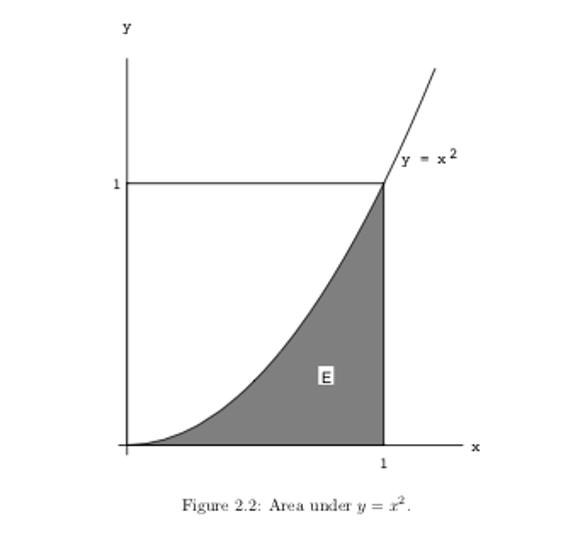

Let's solve the problem in Figure 2.2 through simulation.  We'll use 10,000 samples (or experiements).

In [26]:
# Using rand function, create array of random value of shape 2 rows 
# (row 0=x, row 1=y) and 10000 columns

data=np.random.rand(2,10000) 
data[:,:5]

array([[0.88391109, 0.14215343, 0.43327947, 0.78362186, 0.21258053],
       [0.41217173, 0.33575804, 0.92641327, 0.23960684, 0.41213975]])

In [27]:
# data[0,:] corresponds to values of first row (x)
# data[1,:] corresponds to values of second row (y)

# Now, I compute the random values of the function, y(x), by 
# squaring all random values on of x (first row)

# Finally, I mask the random values of y(x) (x**2) against random values of y

# In other words, check if random values of y fall inside the area under y(x) curve

mask=(data[1,:]<=data[0,:]**2)
mask

array([ True, False, False, ...,  True, False, False])

In [28]:
# Finally, I calculate how often this condition is true using mean function

# Becuase of frequency interpretation of probability, the fraction of 
# times that an event occurs (if we repeate the experiment many times)
# will approximate its true probability and by Monte Carlo procedure,
# the area under y(x)

np.mean(data[1,:]<=data[0,:]**2)

0.3363

## Theoretical probability

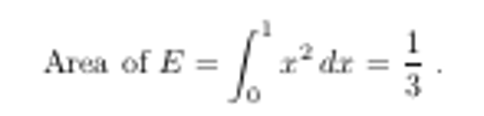

In [29]:
1/3

0.3333333333333333

# Function Information
## numpy.linspace 

numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)[source]

    Return evenly spaced numbers over a specified interval.

    Returns num evenly spaced samples, calculated over the interval [start, stop].

    The endpoint of the interval can optionally be excluded.

    Changed in version 1.16.0: Non-scalar start and stop are now supported.
    Parameters:	

    start : array_like

        The starting value of the sequence.
    stop : array_like

        The end value of the sequence, unless endpoint is set to False. In that case, the sequence consists of all but the last of num + 1 evenly spaced samples, so that stop is excluded. Note that the step size changes when endpoint is False.
    num : int, optional

        Number of samples to generate. Default is 50. Must be non-negative.
    endpoint : bool, optional

        If True, stop is the last sample. Otherwise, it is not included. Default is True.
    retstep : bool, optional

        If True, return (samples, step), where step is the spacing between samples.
    dtype : dtype, optional

        The type of the output array. If dtype is not given, infer the data type from the other input arguments.

        New in version 1.9.0.
    axis : int, optional

        The axis in the result to store the samples. Relevant only if start or stop are array-like. By default (0), the samples will be along a new axis inserted at the beginning. Use -1 to get an axis at the end.

        New in version 1.16.0.

    Returns:	

    samples : ndarray

        There are num equally spaced samples in the closed interval [start, stop] or the half-open interval [start, stop) (depending on whether endpoint is True or False).
    step : float, optional

        Only returned if retstep is True

        Size of spacing between samples.

## Using Linspace function

In [6]:
# Create a sequence of 10000 numbers equally spaced between 0 and 1
x=np.linspace(0,1,10000)
# Calculate mean  
np.sum(x**2)/10000
# This is another way of approximating the area under the X^2 curve
# It behaves like an integration by summing all the fractional values
# x**2

0.3333500016668334

## Estimating Pi by calculating area of unitary circle

Suppose E is the circle with center (1/2, 1/2) and radius 1/2. Then the probability that our random point (x, y) lies inside the circle is equal to the area of the circle, that is:

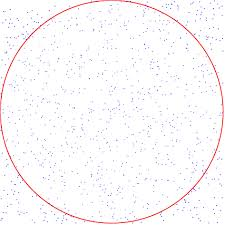

A = pi * r**2 = pi/4

pi = 4 * A

To check if a pair of random points fall inside a circle:

(x-center_x)^2 + (y - center_y)^2 < radius^2

In [31]:
# Create random value of shape 2 rows (0=x, 1=y) and 10000 column
data=np.random.rand(2,1000000)

center_x = 0.5
center_y = 0.5
radius = 0.5

# check to see how many pairs of numbers fall inside circle
p1 = ((data[1,:]-center_y)**2+(data[0,:]-center_x)**2)<radius**2
# calculate average inside inside across all samples
p2 = np.mean(p1)
# To get pi I will multiply by 4
p2*4

3.14184

## Example 2.4

Suppose that we choose two random real numbers in [0, 1] and add them together. Let X be the sum. How is X distributed?

2 rows(0=v1, 1=v2) and 10000 columns
Take two random numbers and add them
Let's X be the sum of two random variables, how is X distributed?

In [21]:
N=10000 # Number of columns
n=2 # Number of rows (i.e. two random variables)
data=np.random.rand(n,N) # Array of shape n x N
data[:,:5]

array([[0.36376515, 0.01730317, 0.76442541, 0.79236207, 0.93530306],
       [0.27267521, 0.8035763 , 0.50709735, 0.09885257, 0.61553316]])

In [33]:
# Add values of two variables
agg=np.sum(data,axis=0)
agg[:5]

array([0.37351862, 0.87297203, 1.66461479, 1.08481127, 1.30830378])

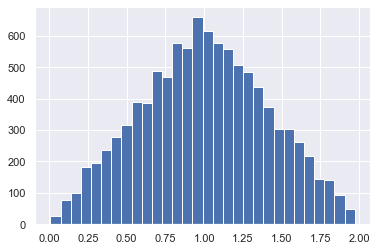

In [23]:
plt.hist(agg,bins=30); # Histogram

# Each bar in the histogram has the property that its area, rather than the height, 
# is equal to the fraction of outcomes that fell in the corresponding interval.

From observing the resulting chart, it appears that the probability function f(x) is 
defined by:

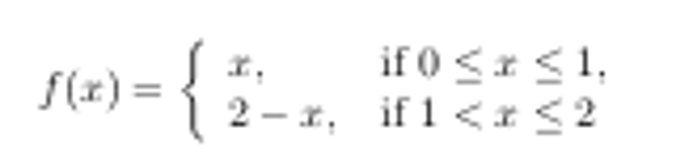

Because of the way the bars were constructed, the sum of the areas of the bars corresponding to the interval [a, b] approximates the probability that a ≤ X ≤ b.

**This suggests that for an experiment with a continuum of possible outcomes, if we find a function with the above property, then we will be able to use it to calculate probabilities for specific intervals.**

## Example 2.5

Suppose that we choose 100 random numbers in [0,1], and let X represent their sum. How is X distributed?

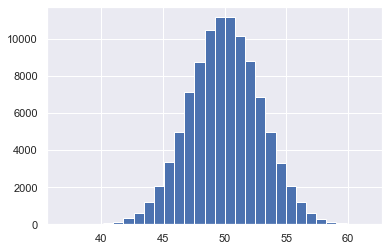

In [35]:
N=100000
n=100
data=np.random.rand(n,N)
plt.hist(np.sum(data,axis=0),bins=30);

It is not so clear what function fits the bars in this case. It turns out that the type of function which does the job is called a normal density function. This type of function is sometimes referred to as a “bell-shaped” curve. It is among the most important functions in the subject of probability

# Chapter 4: Conditional Probability
### In this section we ask and answer the following question. Suppose we assign a distribution function to a sample space and then learn that an event E has occurred. How should we change the probabilities of the remaining events? 

We shall call the new probability for an event F the conditional probability of F given E and denote it by P(F|E).

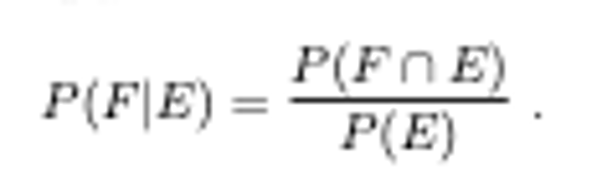

that is the probability of the intersection of F and E (the probability that both events occur) divided by the probability of E 

**Conditional Probability**
The conditional probability of an event B is the probability that the event will occur given the knowledge that an event A has already occurred. This probability is written P(B|A), notation for the probability of B given A. 

**In the case where events A and B are independent (where event A has no effect on the probability of event B), the conditional probability of event B given event A is simply the probability of event B, that is P(B).**

If events A and B are not independent, then the probability of the intersection of A and B (the probability that both events occur) is defined by
P(A and B) = P(A)P(B|A).

From this definition, the conditional probability P(B|A) is easily obtained by dividing by P(A): 


**Example 4.5** We have two urns, I and II. Urn I contains 5 balls (2 black and 3 white). Urn II contains 2 balls (1 black and 1 white). An urn is drawn at random and a ball is chosen at random from it. 

Let us represent the sample space of this experiment as the paths through a tree as shown in Figure 4.1 including the probabilities assigned to the paths.

Let B be the event “a black ball is drawn,” and I the event “urn I is chosen.” Then **the branch weight 2/5, which is shown on one branch in the figure, can now be interpreted as the conditional probability P(B|I).**

### What if we want to calculate P(I|B)?

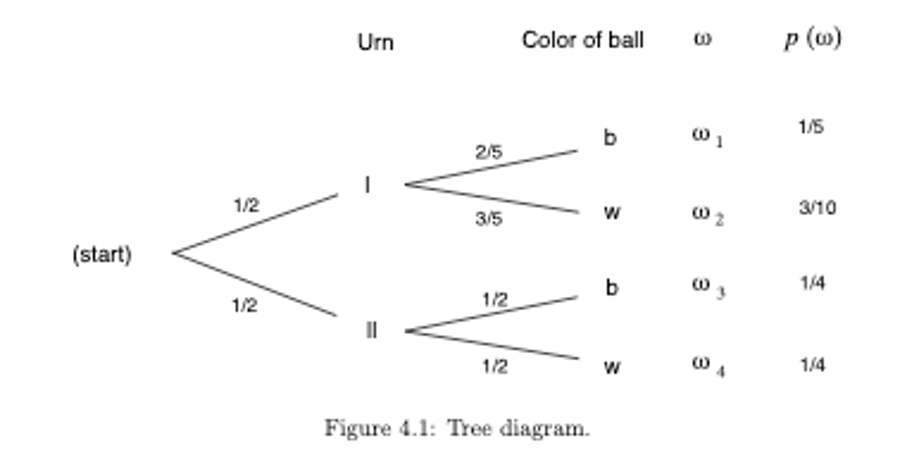

Using the formula, we obtain

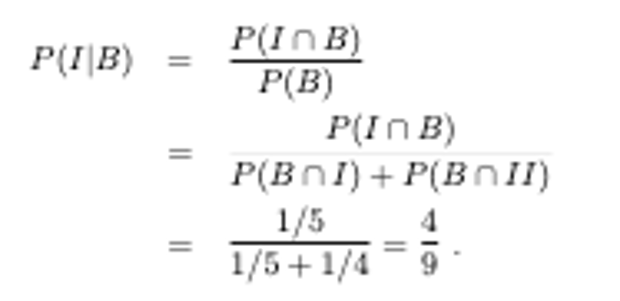

## Bayes Probabilities
Our original tree measure gave us the probabilities for drawing a ball of a given color, given the urn chosen. 

### What if we wanted to calculate the inverse probability? That is what is the probability that a particular urn is chosen given the color of the ball. 

Such an inverse probability is called a Bayes probability and may be obtained by a formula shown above or by simply constructing the tree for the two-stage experiment carried out in reverse order as shown in Figure 4.2.

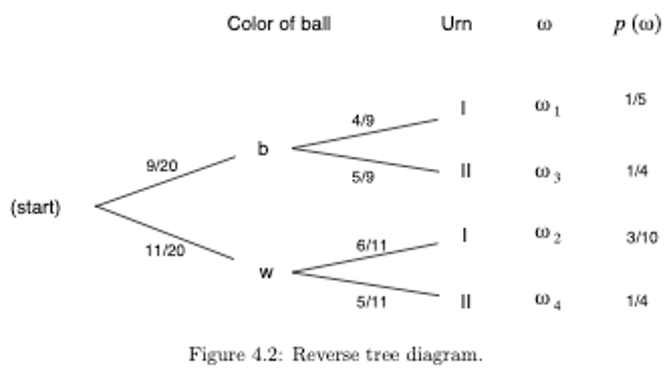

First of all it is important to note that the paths through the reverse tree are in one-to-one correspondence with those in the forward tree, since they correspond to individual outcomes of the experiment, and so they are assigned the same probabilities. 

From the forward tree, we find that the probability of a black ball is:
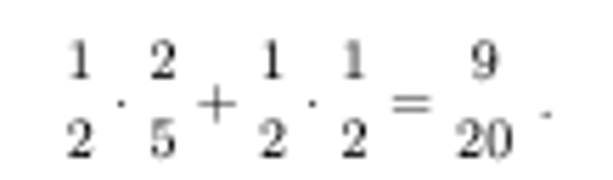

The probabilities for the branches at the second level are found by simple division. For example, if x is the probability to be assigned to the top branch at the second level, we must have
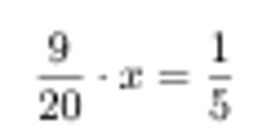

or x = 4/9. Thus, P(I|B) = 4/9, in agreement with our previous calculations. 

### The reverse tree then displays all of the inverse, or Bayes, probabilities.

**Example 4.17** A doctor gives a patient a test for a particular cancer. Before the results of the test, the only evidence the doctor has to go on is that 1 woman in 1000 has this cancer. Experience has shown that, in 99 percent of the cases in which cancer is present, the test is positive; and in 95 percent of the cases in which it is not present, it is negative. 

### Question: If the test turns out to be positive, what probability should the doctor assign to the event that cancer is present?  (in order words, probability patient has cancer given a positive test)

What information we were give:

* Prior(cancer) = .001 and prior(not cancer) = .999. 

* P(+|cancer) = .99, P(−|cancer) = .01, P(+|not cancer) = .05, and P (−|not cancer) = .95. 

**To find this probability, we could use the conditional probability formula or construct a reverse tree and calculate the branch probabilities as shown in Figure 4.5 below**

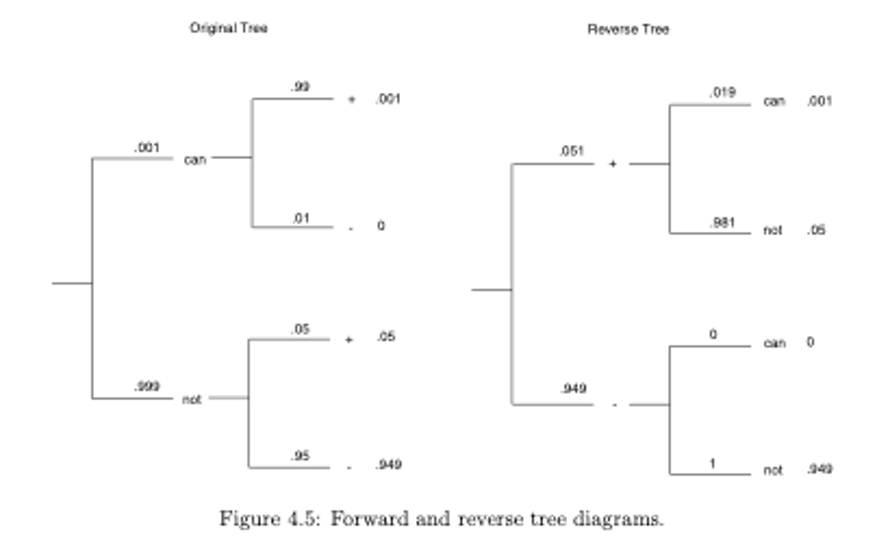

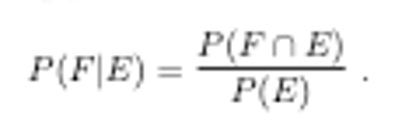

In [36]:
# Prob(+) = 0.001*0.99 + 0.999*0.05
ppos= 0.001*0.99 + 0.999*0.05
ppos

0.05094

In [37]:
# Prob(cancer|+)= 0.001/ppos
pcpos=0.001/ppos
pcpos

0.019630938358853555

### We see now that the probability of cancer given a positive test has only increased from .001 to .019. So, the knowledge the test was positive made ~20 times more likely.

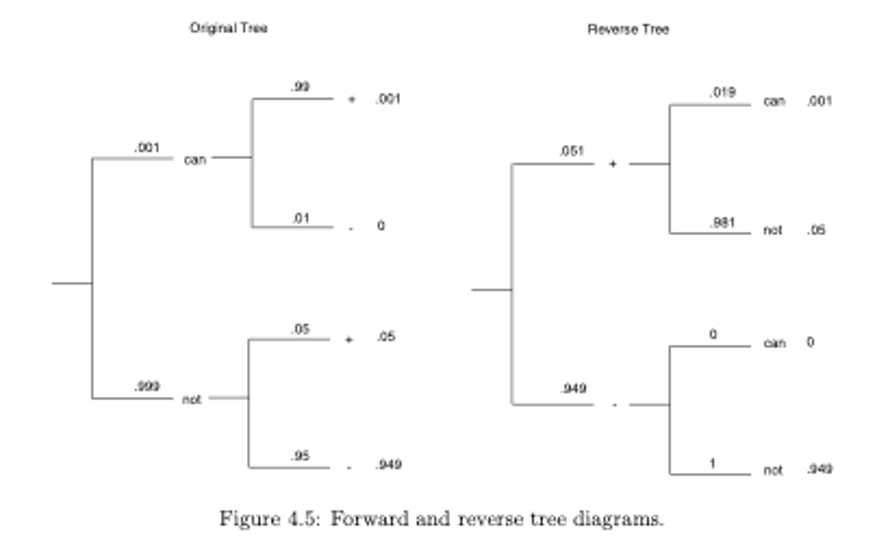

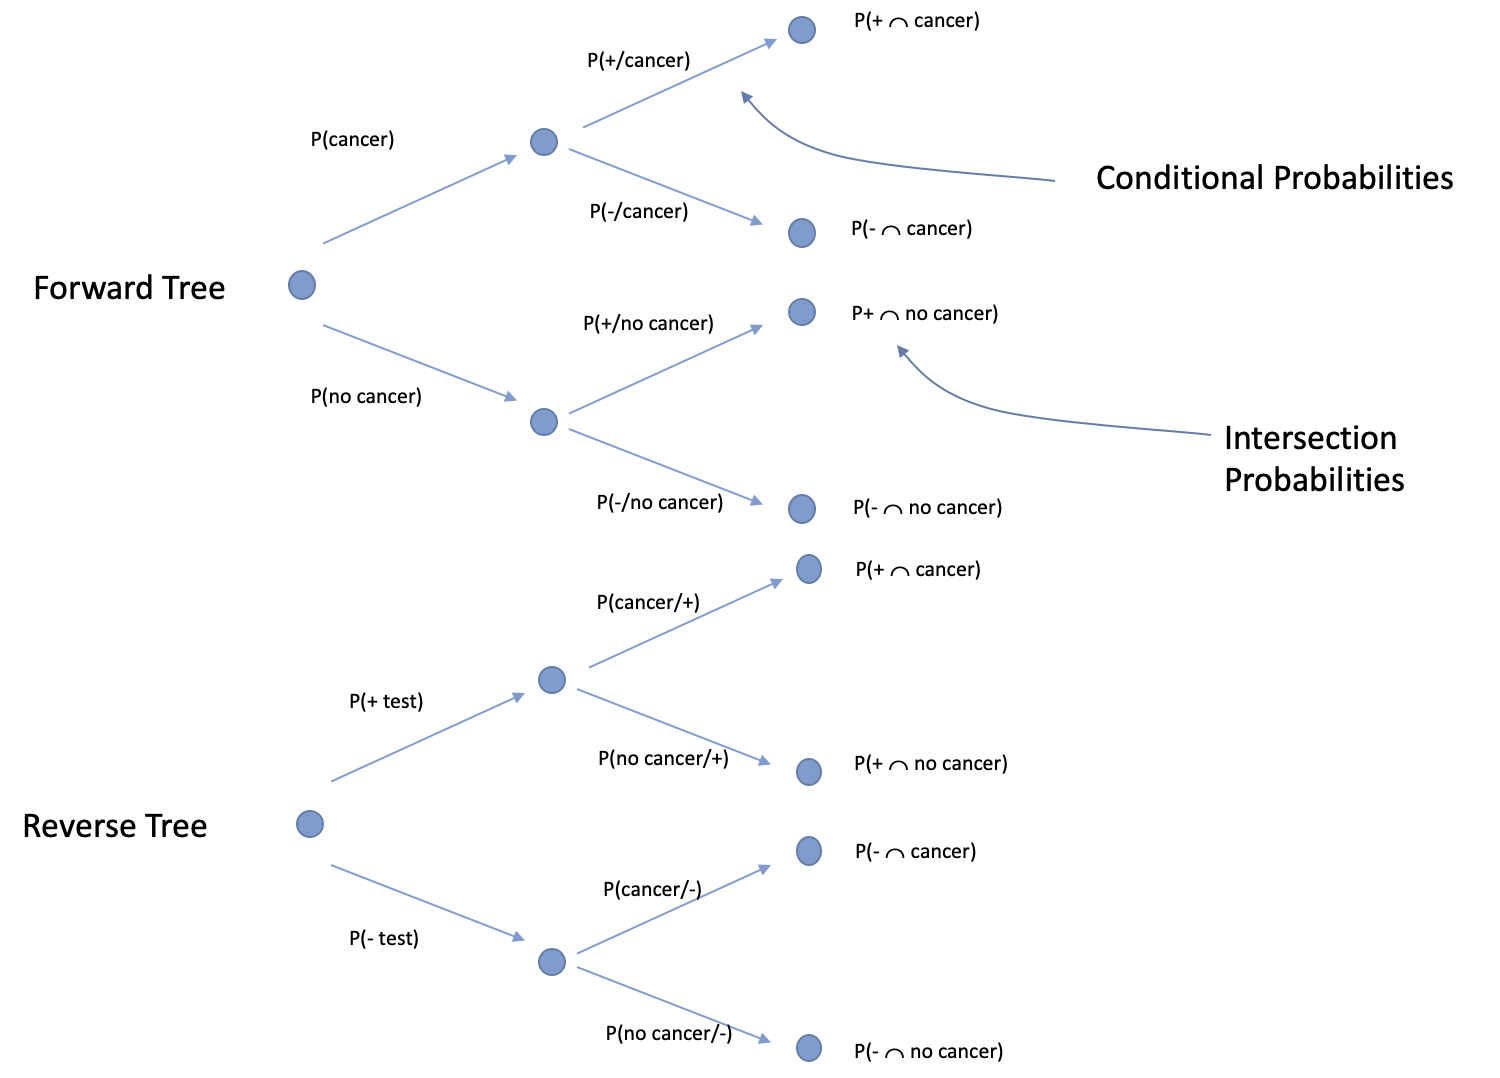



## Example 4.6 We consider now a problem called the Monty Hall problem. 

Suppose you’re on Monty Hall’s Let’s Make a Deal! You are given the choice of three doors, behind one door is a car, the others, goats. You pick a door, say 1, Monty opens another door, say 3, which has a goat. Monty says to you “Do you want to pick door 2?” 

### Is it to your advantage to switch your choice of doors?

We are going to solve this problem in two ways: first, we will use a tree diagam.  Then, we will use computer simulation.

Once we construct our tree diagram, this is how it would look like:
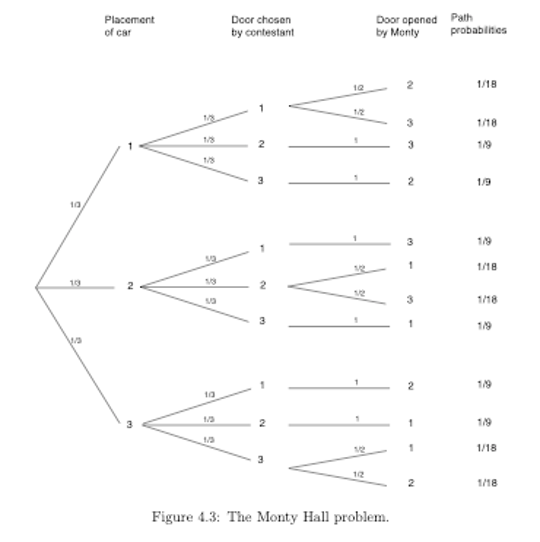

Now the given information, namely that the contestant chose door 1 and Monty chose door 3, means only two paths through the tree are possible (see Figure 4.4) to win the car. For one of these paths, the car is behind door 1 and for the other it is behind door 2. 

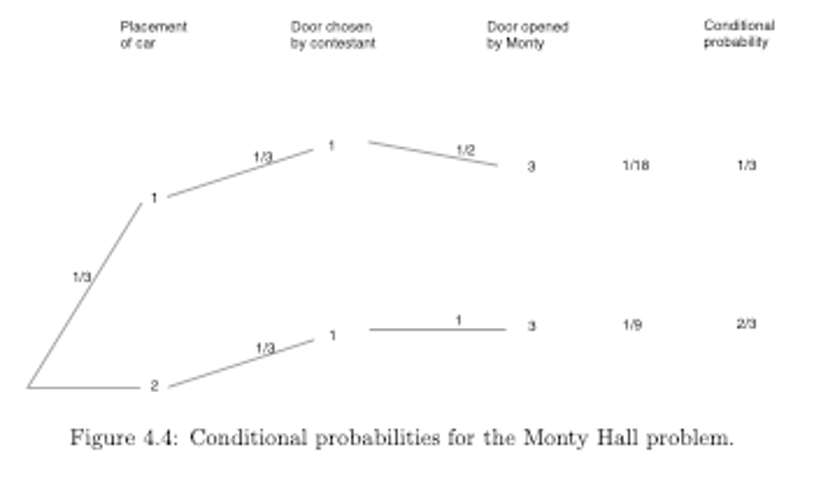

The path with the car behind door 2 is twice as likely as the one with the car behind door 1. Thus the conditional probability (of winning the car given player chose door 1 and Monty chose door 3) is 2/3 that the car is behind door 2 and 1/3 that it is behind door 1, so...

### ...if you switch you have a 2/3 chance of winning the car!

## Simulation of Monty Hall problem

In [38]:
# Simulate N experiments
import numpy as np
N = 10000

# Create two random variables

# First row is where car is located
# Second row is the player's initial door selection

# Each column is a different experiment

data=np.random.randint(1,4,[2,N])

# Create an array for alternate option

other = np.zeros(N).astype(int)

# Let's create alternate door option

# There are two posibilities

for i in range(N):
    # Player selected the right door, give him/her a bogus option
    if (data[0,i]==data[1,i]):
        # Other option (Monty assigns door randomly)
        other[i] = (data[0,i]%3 + 1)    # Give player one of the other doors
    # If Player selected the wrong door, make location of car the other option
    else:
        other[i] = data[0,i]

# Now let's calculate probabilities

# Probability of winning car with initial door selection

prob1=np.mean(data[0,:]==data[1,:])

print("Prob. winning car with stay strategy is {}%".format(np.round(100*prob1,2)))

# Now probability of winning car with alternate door selection
mask=(data[0,:]==other)
prob2=np.mean(mask)
print("Prob. winning car with switch strategy is {}%".format(np.round(100*prob2,2)))

Prob. winning car with stay strategy is 33.36%
Prob. winning car with switch strategy is 66.64%


## In Summary...

- We discussed how to estimate the probabilities when dealing with a continuum set of outcomes

- We described the Monte Carlo procedure and described how we can use it to estimate areas using random variables

- We discussed conditional probability, tree diagrams and Bayes probabilities

- We walked through the Monty Hall problem